# Project: Hospital simulation
### Stu. name: Amirali Khatib
### Prof. name: Dr.Mohammad Ranjbar

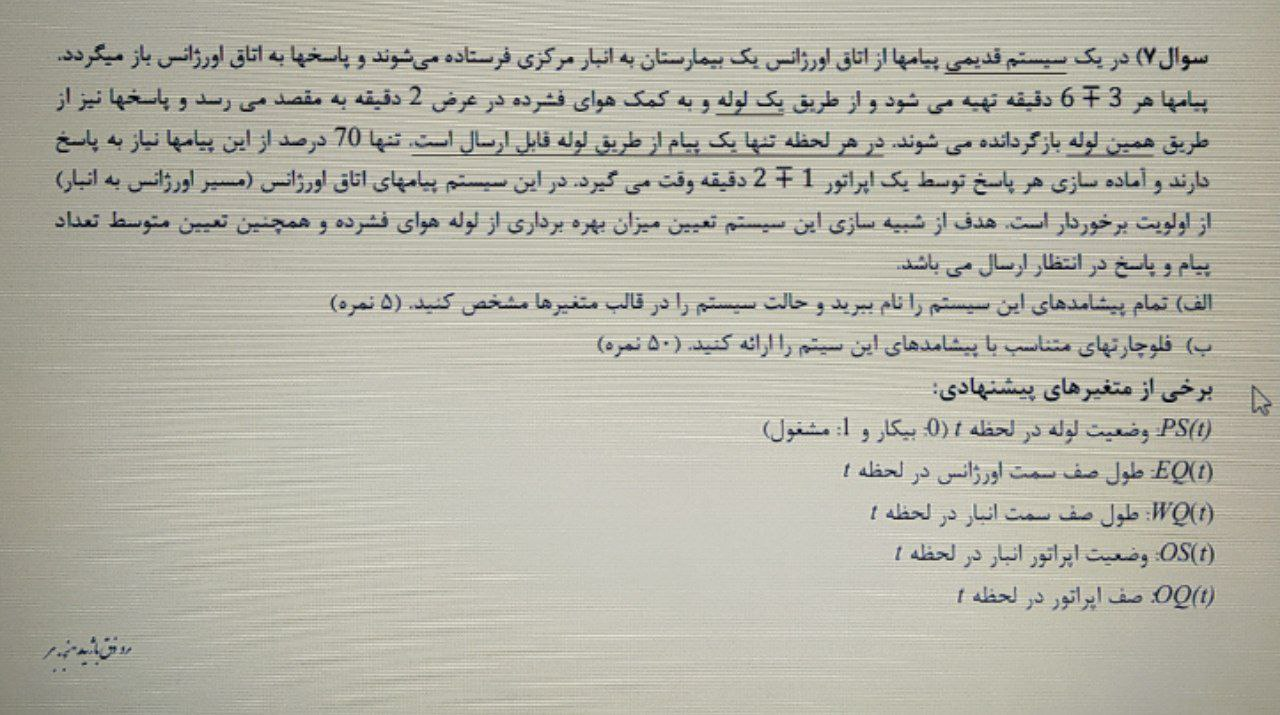

**Problem:**

In a hostpital that is equipped by an old massaging system, mail envelopes send from **emergency room** to **warehouse**. In the warehouse, an **operator** is resposible for answering the massages and send them back to the **emergency room**. Each $t_{1} = Uniform(3,9)$ minutes, a new mail envelope is recieved in **emergency room**. There is a pipe  which is located between these 2 rooms do the transfering (by using compressed air) of massages' envelope bidirectionally. the transfering time is exactly **2** minutes. Generally, only **one massage** can be transfered via the pipe. Regarding previous experience, The operator finds **70 percent** of massages eligible to be replied. The time that each massage need to be answered completely is $t_{2} = Unifrom(1,3)$. In this system envelopes in **warehouse queue** have higher priority than the ones in **emergency queue**. 

(Note: specify the first 20 minutes of simulation to warm up time) 

Simulate this procedure to answer this question:
* Proportion of pipe busy time to total time.
* Average number of Massages for each 3 queues.
* Proportion of operator busy time to total time.
* Average of time that an envelope spend in each 3 queue separately. 

In [11]:
import numpy as np
import pandas as pd

In [12]:
simulation_time = float(input('Enter simulation time...\n'))

Enter simulation time...
480


In [13]:
def initializer():
    global FEL, current_time, pipe_status, operator_status, e_pipe_busytime, w_pipe_busytime,o_busytime
    global emergency_queue, operator_queue, warehouse_queue
    global w_time_history, w_queue_history, e_time_history, e_queue_history, o_time_history, o_queue_history
    global enter_e, start_e, enter_o, start_o, enter_w, start_w
    
    FEL = []
    current_time = 0    # float
    
    # We use busy_time variable to be accumulated during the simulation and finally calculate the busy time proportion 
    e_pipe_busytime = 0 # float
    w_pipe_busytime = 0 # float
    o_busytime = 0      # float
    
    # Status variable in time (t)
    pipe_status = 0     # binary  pipe status in time (t) --> free (0), busy (1)
    operator_status = 0 # binary  operator status in time (t) --> free (0), busy (1)
    emergency_queue = 0 # integer number of envelope in emergency queue in time (t)
    operator_queue = 0  # integer number of envelope in operator queue in time (t)
    warehouse_queue = 0 # integer number of envelope in warehouse queue in time (t)
    
    # These lists will help us to measure the average of number of envelope in each 3 queues
    ## Note: any change in queue status make use to append its new value and its corresponding...
    ## current time to their related list
    w_time_history = []
    w_queue_history = []
    e_time_history = []
    e_queue_history = []
    o_time_history = []
    o_queue_history = []
    
    # These lists will help us to measure the average of waiting time in each 3 queues
    enter_e = []
    start_e = []
    enter_o = []
    start_o = []
    enter_w = []
    start_w = []
    
    FEL.append((current_time, 'Ae'))    
    return None

In [14]:
def arrival_emergency():
    global FEL, current_time, pipe_status, operator_status, e_pipe_busytime, w_pipe_busytime, o_busytime
    global emergency_queue, operator_queue, warehouse_queue
    global w_time_history, w_queue_history, e_time_history, e_queue_history, o_time_history, o_queue_history
    global enter_e, start_e, enter_o, start_o, enter_w, start_w

    enter_e.append(current_time)
    
    FEL.append((current_time + float(np.random.uniform(3,9,1)) , 'Ae'))
    FEL.sort()
    
    
    if pipe_status == 0:
        pipe_status = 1
        start_e.append(current_time)
        if current_time > 20: e_pipe_busytime += 2
        FEL.append((current_time + 2, 'Aw'))
        FEL.sort()
    else:
        emergency_queue += 1
        if current_time > 20: 
            e_queue_history.append(emergency_queue)
            e_time_history.append(current_time)
            
    return None

In [15]:
def arrival_warehouse():
    global FEL, current_time, pipe_status, operator_status, e_pipe_busytime, w_pipe_busytime, o_busytime
    global emergency_queue, operator_queue, warehouse_queue
    global w_time_history, w_queue_history, e_time_history, e_queue_history, o_time_history, o_queue_history
    global enter_e, start_e, enter_o, start_o, enter_w, start_w

    if emergency_queue == 0:
        if warehouse_queue == 0:
            pipe_status = 0
        else:
            warehouse_queue -= 1
            start_w.append(current_time)
            if current_time > 20:
                w_queue_history.append(warehouse_queue)
                w_time_history.append(current_time)
                w_pipe_busytime += 2
            FEL.append((current_time + 2, 'Dw'))
            FEL.sort()
    else:
        emergency_queue -= 1
        start_e.append(current_time)
        if current_time > 20:
            e_queue_history.append(emergency_queue)
            e_time_history.append(current_time)
            e_pipe_busytime += 2
        FEL.append((current_time + 2, 'Aw'))
        FEL.sort()
    
    choice_prob = float(np.random.uniform(0,1,1))
    
    if choice_prob <= 0.7:
        enter_o.append(current_time)
        if operator_status == 0:
            operator_status = 1
            start_o.append(current_time)
            service_time = float(np.random.uniform(1,3,1))
            if current_time > 20: o_busytime += service_time
            FEL.append((current_time + service_time, 'Do'))
            FEL.sort()
        else:
            operator_queue += 1
            if current_time > 20:
                o_queue_history.append(operator_queue)
                o_time_history.append(current_time)
    else:
        pass
    
    return None

In [16]:
def departure_operator():
    global FEL, current_time, pipe_status, operator_status, e_pipe_busytime, w_pipe_busytime,o_busytime
    global emergency_queue, operator_queue, warehouse_queue
    global w_time_history, w_queue_history, e_time_history, e_queue_history, o_time_history, o_queue_history
    global enter_e, start_e, enter_o, start_o, enter_w, start_w
    
    enter_w.append(current_time)
    
    if pipe_status == 0:
        pipe_status = 1
        start_w.append(current_time)
        if current_time > 20: w_pipe_busytime += 2
        FEL.append((current_time + 2, 'Dw'))
        FEL.sort()
    else:
        warehouse_queue += 1
        if current_time > 20:
            w_queue_history.append(warehouse_queue)
            w_time_history.append(current_time)
              
    if operator_queue == 0:
        operator_status = 0       
    else:
        operator_queue -= 1
        start_o.append(current_time)
        service_time = float(np.random.uniform(1,3,1))
        if current_time > 20:
            o_busytime += service_time
            o_queue_history.append(operator_queue)
            o_time_history.append(current_time)
        FEL.append((current_time + service_time, 'Do'))
        FEL.sort()
    
    return None

In [17]:
def departure_warehouse():
    global FEL, current_time, pipe_status, operator_status, e_pipe_busytime, w_pipe_busytime, o_busytime
    global emergency_queue, operator_queue, warehouse_queue
    global w_time_history, w_queue_history, e_time_history, e_queue_history, o_time_history, o_queue_history
    global enter_e, start_e, enter_o, start_o, enter_w, start_w
    
    if emergency_queue == 0:
        if warehouse_queue == 0:
            pipe_status = 0
        else:
            warehouse_queue -= 1
            start_w.append(current_time)
            if current_time > 20:
                w_queue_history.append(warehouse_queue)
                w_time_history.append(current_time)
                w_pipe_busytime += 2
            FEL.append((current_time + 2, 'Dw'))
            FEL.sort()
    else:
        emergency_queue -= 1
        start_e.append(current_time)
        if current_time > 20:
            e_queue_history.append(emergency_queue)
            e_time_history.append(current_time)
            e_pipe_busytime += 2
        FEL.append((current_time + 2, 'Aw'))
        FEL.sort()
        
    return None

In [18]:
def average_queue(queue_history, time_history, simulation_time):
    avg_queue = 0
    for i in range (len(time_history)-1):
        avg_queue += (time_history[i+1] - time_history[i]) * queue_history[i]
    return avg_queue / simulation_time    

In [19]:
def Filter(enter, start, simulation_time):
    enter = np.array(enter)
    start = np.array(start)
    res_20 = len(enter[enter <= 20])
    enter = enter[res_20:]
    start = start[res_20:]
    start = start[start <= simulation_time]
    enter = enter[:len(start)]
    
    return enter, start

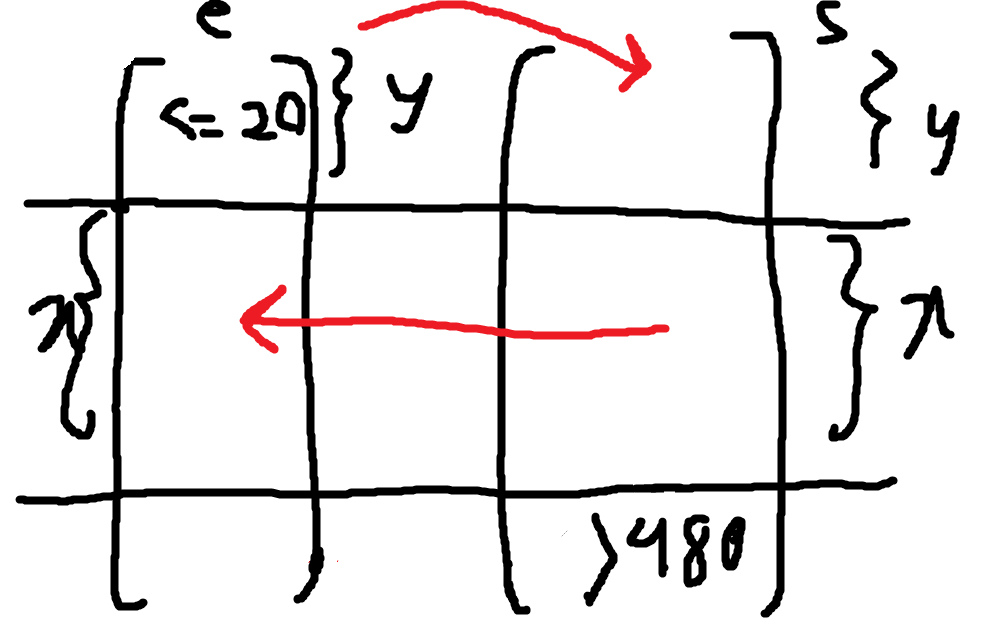

In [30]:
# main
e_pipe_busy_time_list = []
w_pipe_busy_time_list = []
o_busy_time_list = []
average_e_queue_list = []
average_w_queue_list = []
average_o_queue_list = []
average_e_wait_list = []
average_w_wait_list = []
average_o_wait_list = []

replication = int(input('Enter number of simulation replication:'))

for j in range(replication):
    initializer()
    while current_time < simulation_time:
        current_time, event_type = FEL.pop(0)
        if event_type == 'Ae':
            arrival_emergency()
        elif event_type == 'Aw':
            arrival_warehouse()
        elif event_type == 'Do':
            departure_operator()
        elif event_type == 'Dw':
            departure_warehouse()

    w_queue_history.append(warehouse_queue)
    w_time_history.append(simulation_time)
    e_queue_history.append(emergency_queue)
    e_time_history.append(simulation_time)
    o_queue_history.append(emergency_queue)
    o_time_history.append(simulation_time)
    
    enter_e, start_e = Filter(enter_e , start_e, simulation_time)
    #
    enter_o, start_o = Filter(enter_o , start_o, simulation_time)
    #
    enter_w, start_w = Filter(enter_w, start_w, simulation_time)
    
    # for jth replication:
    e_pipe_busy_time_list.append(100 * e_pipe_busytime / (simulation_time - 20))
    w_pipe_busy_time_list.append(100 * w_pipe_busytime / (simulation_time - 20))
    o_busy_time_list.append(100 * o_busytime / (simulation_time - 20))
    average_e_queue_list.append(average_queue(e_queue_history, e_time_history, simulation_time))
    average_w_queue_list.append(average_queue(w_queue_history, w_time_history, simulation_time))
    average_o_queue_list.append(average_queue(o_queue_history, o_time_history, simulation_time))
    average_e_wait_list.append(float(np.mean(start_e - enter_e)))
    average_o_wait_list.append(float(np.mean(start_o - enter_o)))
    average_w_wait_list.append(float(np.mean(start_w - enter_w)))

    
table_data = np.column_stack((e_pipe_busy_time_list, w_pipe_busy_time_list, o_busy_time_list,
                              average_e_queue_list, average_w_queue_list, average_o_queue_list,
                              average_e_wait_list, average_w_wait_list, average_o_wait_list))

table = pd.DataFrame(data = table_data, 
                     index=list(range(1,replication+1)),
                     columns=['ep_busytime', 'wp_busytime', 'o_busytime',
                              'avg_equeue_length', 'avg_wqueue_length', 'avg_oqueue_length',
                              'avg_ewait', 'avg_wwait', 'avg_owait'])
table

Enter number of simulation replication:1


,ep_busytime,wp_busytime,o_busytime,avg_equeue_length,avg_wqueue_length,avg_oqueue_length,avg_ewait,avg_wwait,avg_owait
1,33.478261,24.782609,25.613216,0.047133,0.036113,0.001736,0.293817,0.304112,0.014619


In [31]:
np.mean(table.ep_busytime)

33.47826086956522

In [32]:
np.mean(table.wp_busytime)

24.782608695652176

In [33]:
np.mean(table.o_busytime)

25.613215858328076

In [34]:
np.mean(table.avg_equeue_length)

0.04713316991554091

In [35]:
np.mean(table.avg_wqueue_length)

0.03611324522587146

In [36]:
np.mean(table.avg_oqueue_length)

0.0017359843989134187

In [37]:
np.mean(table.avg_ewait)

0.2938171631098654

In [38]:
np.mean(table.avg_wwait)

0.30411153874418073

In [39]:
np.mean(table.avg_owait)

0.014618815990849842